In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
hr_url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/HR%20Analytics.csv'
hr = pd.read_csv(hr_url)

In [5]:
hr_dummies = pd.get_dummies(hr)

In [6]:
train, test = train_test_split(hr_dummies, test_size = 0.3, random_state = 100)

In [7]:
mi_unique = np.unique(train['MonthlyIncome'])
cuts = pd.Series(mi_unique).rolling(2).mean()[1:]
cuts.head()

1    1030.0
2    1066.0
3    1086.0
4    1096.5
5    1110.0
dtype: float64

In [8]:
df_gi_cuts = pd.DataFrame(columns=['cut', 'gi'])
for cut in cuts:
    sample_left = train[train['MonthlyIncome']<cut]
    sample_right = train[train['MonthlyIncome']>cut]

    nparent = train.shape[0]
    nleft = sample_left.shape[0]
    nright = sample_right.shape[0]
    #print(nparent, nleft, nright)

    p0_left = sample_left[sample_left['Attrition']==0].shape[0] / nleft
    p1_left = sample_left[sample_left['Attrition']==1].shape[0] / nleft
    gi_left = 1 - np.square(p0_left) - np.square(p1_left)

    p0_right = sample_right[sample_right['Attrition']==0].shape[0] / nright
    p1_right = sample_right[sample_right['Attrition']==1].shape[0] / nright
    gi_right = 1 - np.square(p0_right) - np.square(p1_right)

    gi_overall = (nleft/nparent*gi_left) + (nright/nparent*gi_right)
    df_gi_cuts = df_gi_cuts.append({'cut': cut, 'gi' : gi_overall}, ignore_index= True)
    #print(gi_overall)
df_gi_cuts.head()

,cut,gi
0,1030.0,0.270543
1,1066.0,0.271464
2,1086.0,0.270421
3,1096.5,0.269213
4,1110.0,0.267937


In [9]:
df_gi_cuts.sort_values(by=['gi']).head()

,cut,gi
202,2779.5,0.254494
203,2781.5,0.254687
185,2693.5,0.254709
143,2489.5,0.254749
199,2766.0,0.254780


In [10]:
## [] displays as series also only 1 column can be selected and 
###[[]] displays data as dataframe also multiple columns can be selected
##### if there are spaces in colnames use [] otherwise . can be used
train_y = train['Attrition']
test_y = test['Attrition']
train_x = train[['MonthlyIncome', 'Age', 'DistanceFromHome']]
test_x = test[['MonthlyIncome', 'Age', 'DistanceFromHome']]

model = DecisionTreeClassifier(random_state=100, max_depth=3)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [11]:
## open is to connect with physical memory and python, if file is not available python creates the file.
###"w" is used for write mode

from sklearn import tree
with open("model.dot", "w") as f:
    f = tree.export_graphviz(model, out_file = f, feature_names = train_x.columns)

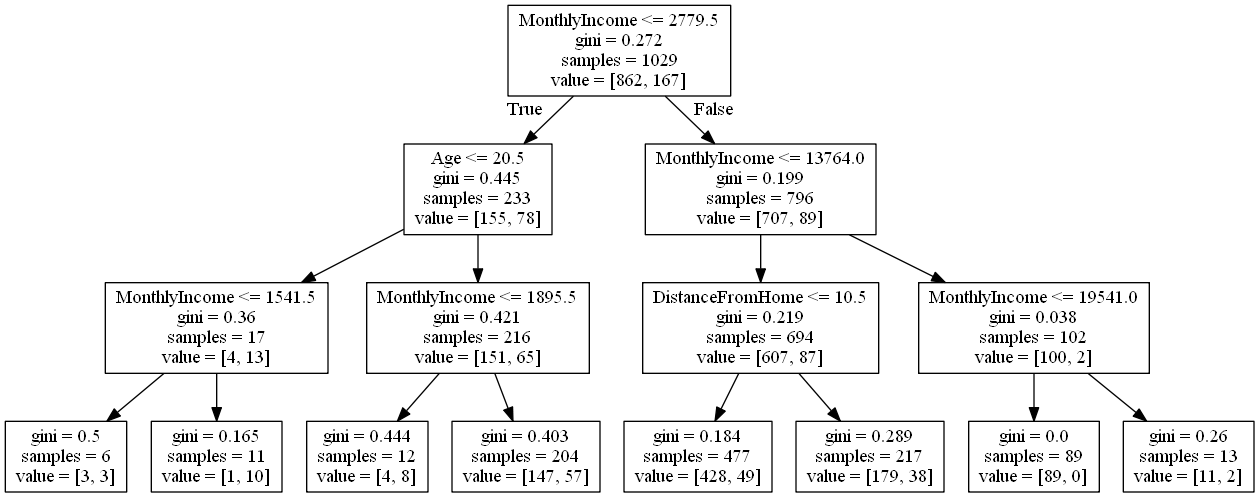

In [12]:
draw_tree(model, train_x.columns)

In [106]:
pd.DataFrame(model.predict_proba(test_x)).head() 

,0,1
0,0.839695,0.160305
1,0.301887,0.698113
2,0.929432,0.070568
3,0.800000,0.200000
4,1.000000,0.000000


In [24]:
## to check pwd

import os
os.getcwd()

'C:\\Users\\Administrator'

# BANK DATASET

In [50]:
bank = pd.read_csv('C:/Users/Administrator/Desktop/Datasets/bank.csv', sep= ';')

In [51]:
bank_new = bank.drop('y', axis = 1)
bank_dummies = pd.get_dummies(bank_new)

In [52]:
bank_dummies['y'] = bank['y']
bank_dummies.shape

(45211, 52)

In [53]:
train, test = train_test_split(bank_dummies, test_size = 0.3, random_state = 100)

In [57]:
train_y = train['y']
test_y = test['y']
train_x = train.drop('y', axis = 1)
test_x = test.drop('y', axis = 1)

In [56]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [70]:
model = DecisionTreeClassifier(random_state=100, max_depth=3)
model.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [60]:
test_pred = model.predict(test_x)
print(len(test_pred))
test_pred[:5]

13564


array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [71]:
from sklearn import tree
with open("model.dot", "w") as f:
    f = tree.export_graphviz(model, out_file = f, feature_names = train_x.columns)

In [78]:
!pip install pydotplus
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

import os
graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + graphviz_path

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
def draw_tree(model, columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image

    import os
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path
    
    dot_data = StringIO()
    tree.export_graphviz(model,
                         out_file=dot_data,
                         feature_names = columns)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [80]:
#os.environ['PATH']

'C:\\Users\\Administrator\\Anaconda3\\DLLs;C:\\Users\\Administrator\\Anaconda3;C:\\Users\\Administrator\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Administrator\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Administrator\\Anaconda3\\Library\\bin;C:\\Users\\Administrator\\Anaconda3\\Scripts;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Users\\Administrator\\Anaconda3;C:\\Users\\Administrator\\Anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Administrator\\Anaconda3\\Library\\usr\\bin;C:\\Users\\Administrator\\Anaconda3\\Library\\bin;C:\\Users\\Administrator\\Anaconda3\\Scripts;C:\\Users\\Administrator\\AppData\\Local\\Microsoft\\WindowsApps;C:\\Program Files (x86)\\Graphviz2.38/bin/;C:\\Program Files (x86)\\Graphviz2.38/bin/;C:\\Program Files (x86)\\Graphviz2.38/bin/;C:\\Program Files (x86)\\Graphviz2.38/bin/'

In [2]:
draw_tree(model, train_x.columns)

NameError: name 'model' is not defined

In [ ]:
test[['MonthlyIncome', 'Overtime_No']]

# RANDOM FOREST

In [112]:
all_cols = train.drop('Attrition', axis=1).columns
cols_used = all_cols[np.random.randint(1, len(all_cols), 3)]
print(cols_used)

train_y = train['Attrition']
test_y = test['Attrition']

train_x = train[cols_used]
test_x = test[cols_used]

model = DecisionTreeClassifier(random_state=100)
model.fit(train_x,train_y)
pd.DataFrame(model.predict(test_x), index=test.index, columns=['Attrition_Predicted'])

# HYPERPARAMETES are:
## No. of tree -----> ntree
## No. of columns ----> mtry ---> round(sqrt(D)) where D is No. of columns in training data

Index(['HourlyRate', 'EnvironmentSatisfaction', 'JobRole_Sales Executive'], dtype='object')


,Attrition_Predicted
880,0
152,0
1466,0
1084,0
1086,0
1392,0
57,0
956,0
1400,0
1175,1


In [114]:
train_y = train['Attrition']
test_y = test['Attrition']

train_x = train.drop('Attrition', axis = 1)
test_x = test.drop('Attrition', axis = 1)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(train_x, train_y)

test_pred = model_rf.predict(test_x)
df_pred = pd.DataFrame({'actual' : test_y,
                       'predicted' : test_pred})
df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']
df_pred['pred_status'].sum() / df_pred.shape[0] * 100

85.71428571428571